In [1]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras

In [2]:
from keras.models import Sequential
#this gives our network as a sequential network

from keras.layers import Conv2D
#we are working on images so it is in 2D 

from keras.layers import MaxPooling2D

from keras.layers import Flatten
#it is process of coverting all resultant 2d arrays as single long continuous linear vector  

from keras.layers import Dense, Dropout
#full connection of nn is done by dense

In [3]:
img=ImageDataGenerator(rescale=1./255,zoom_range=0.05, fill_mode='constant',cval=0.,
                       horizontal_flip=True,vertical_flip=True,validation_split=0.2)

In [4]:
classes = os.listdir('../input/emotion-detection-3-channel/emotions dataset_3')
num_class=len(classes)
num_class

7

In [12]:
SEED = 548
BATCH_SIZE = 128
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224

In [13]:
train_ds = img.flow_from_directory('../input/emotion-detection-3-channel/emotions dataset_3',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="training")

Found 22968 images belonging to 7 classes.


In [14]:
val_ds = img.flow_from_directory('../input/emotion-detection-3-channel/emotions dataset_3',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="validation")

Found 5741 images belonging to 7 classes.


In [15]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
# tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.09),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.09),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.09),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.09),
# tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8192, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(7, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)      

In [17]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(
    train_ds,
    steps_per_epoch = 22968//128,
    epochs = 20,
    validation_data = val_ds
)

Epoch 1/20
179/179 [==============================] - 363s 2s/step - loss: 1.8287 - accuracy: 0.2370 - val_loss: 1.8002 - val_accuracy: 0.2564
Epoch 2/20
179/179 [==============================] - 323s 2s/step - loss: 1.7569 - accuracy: 0.2765 - val_loss: 1.7630 - val_accuracy: 0.2750
Epoch 3/20
179/179 [==============================] - 323s 2s/step - loss: 1.6855 - accuracy: 0.3251 - val_loss: 1.6272 - val_accuracy: 0.3555
Epoch 4/20
179/179 [==============================] - 323s 2s/step - loss: 1.5767 - accuracy: 0.3838 - val_loss: 1.5322 - val_accuracy: 0.4015
Epoch 5/20
179/179 [==============================] - 324s 2s/step - loss: 1.4959 - accuracy: 0.4231 - val_loss: 1.4774 - val_accuracy: 0.4278
Epoch 6/20
179/179 [==============================] - 324s 2s/step - loss: 1.4499 - accuracy: 0.4394 - val_loss: 1.4385 - val_accuracy: 0.4396
Epoch 7/20
179/179 [==============================] - 324s 2s/step - loss: 1.3911 - accuracy: 0.4637 - val_loss: 1.3926 - val_accuracy: 0.4612

In [23]:
import matplotlib.pyplot as plt

metrics of cnn model


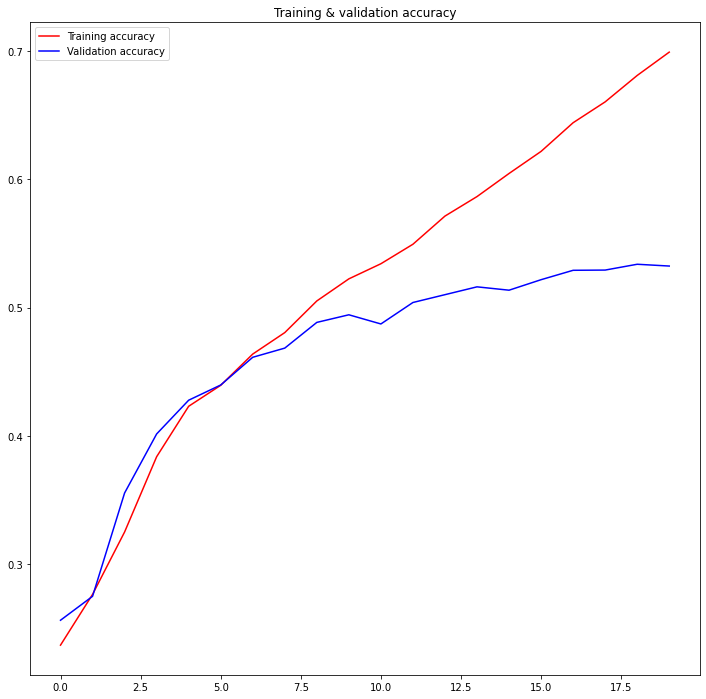

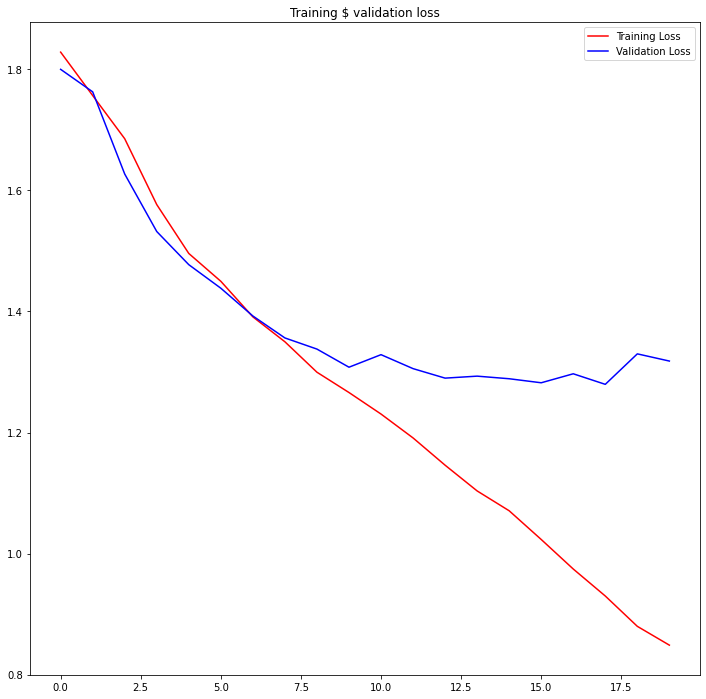

In [24]:
print("metrics of cnn model")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()
plt.show()